In [478]:
#Importing Packages
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import audioflux as af
from scipy.io import wavfile
import sounddevice as sd
import librosa
import librosa.display
from sklearn.model_selection import train_test_split
import cv2
from sklearn import metrics
from sklearn.utils import shuffle
import IPython.display as ipd
from IPython.display import Audio
import librosa.display
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import tensorflow.keras.layers as L
import datetime
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pickle

In [479]:
#Loading Datasets
savee = os.listdir('savee_dataset')
crema_d = os.listdir('crema_d_dataset')
ravdess = os.listdir('ravdess_dataset')
tess = os.listdir('TESS')

In [480]:
#Classifying Savee Dataset
emotion = []
for wav in savee:
    w = wav.split('_')[1]
    if w[0:2] == 'sa':
        emotion.append('male_sad')
    elif w[0] == 'n':
        emotion.append('male_neutral')
    elif w[0:2] == 'su':
        emotion.append('male_surprised')
    elif w[0] == 'f':
        emotion.append('male_fear')
    elif w[0] == 'd':
        emotion.append('male_disgust')
    elif w[0] == 'h':
        emotion.append('male_happy')
    elif w[0] =='a':
        emotion.append('male_anger')
print(len(emotion))

480


In [481]:
#Creating Dataframe
emotion_df = pd.DataFrame(emotion, columns=['Emotions'])
path_df = pd.DataFrame(savee, columns=['Path'])
savee_df = pd.concat([emotion_df, path_df], axis = 1)
savee_df['folder'] = 'savee_dataset/'
savee_df.head(10)

Emotions         Path          folder
0        male_sad  JK_sa01.wav  savee_dataset/
1        male_sad  JK_sa15.wav  savee_dataset/
2    male_neutral   DC_n13.wav  savee_dataset/
3  male_surprised  DC_su09.wav  savee_dataset/
4    male_neutral   DC_n07.wav  savee_dataset/
5    male_neutral   JK_n20.wav  savee_dataset/
6    male_neutral   JK_n08.wav  savee_dataset/
7        male_sad  JE_sa08.wav  savee_dataset/
8       male_fear   JK_f15.wav  savee_dataset/
9       male_fear   JK_f01.wav  savee_dataset/

In [482]:
tess.remove('.DS_Store')

In [483]:
#Classifying Tess dataset
emotion=[]
tess_wavs=[]
for folder in tess:
    fname=os.listdir('TESS/' + folder)
    for files in fname:
        tess_wavs.append(f'{folder}/{files}')
        if folder == 'OAF_Sad' or folder == 'YAF_sad':
            emotion.append('female_sad')
        elif folder == 'OAF_neutral' or folder == 'YAF_neutral':
            emotion.append('female_neutral')
        elif folder == 'OAF_Pleasant_surprise' or folder == 'YAF_pleasant_surprised':
            emotion.append('female_surprised')
        elif folder == 'OAF_Fear' or folder == 'YAF_fear':
            emotion.append('female_fear')
        elif folder == 'OAF_disgust' or folder == 'YAF_disgust':
            emotion.append('female_disgust')
        elif folder == 'OAF_happy' or folder == 'YAF_happy':
            emotion.append('female_happy')
        elif folder =='OAF_angry' or folder == 'YAF_angry':
            emotion.append('female_anger')

In [484]:
#Creating Dataframe for tess
emotion_df = pd.DataFrame(emotion, columns=['Emotions'])
path_df = pd.DataFrame(tess_wavs, columns=['Path'])
tess_df = pd.concat([emotion_df, path_df], axis = 1)
tess_df['folder'] = 'TESS/'

In [485]:
tess_df['Emotions'].value_counts()

Emotions
female_disgust      400
female_surprised    400
female_happy        400
female_sad          400
female_neutral      400
female_fear         400
female_anger        400
Name: count, dtype: int64

In [486]:
tess_df = shuffle(tess_df).reset_index(drop=True)
tess_df.shape

(2800, 3)

In [487]:
tess_df=tess_df.loc[0:1000]

In [488]:
#Classifying crema_d dataset
emotion = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,
          1046,1047,1049,1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,
          1084,1089,1091]
for wav in crema_d:
    w = wav.split('_')
    if int(w[0]) in female:
        if w[2] == 'SAD':
            emotion.append('female_sad')
        elif w[2] == 'NEU':
            emotion.append('female_neutral')
        elif w[2] == 'SUR':
            emotion.append('female_surprised')
        elif w[2] == 'FEA':
            emotion.append('female_fear')
        elif w[2] == 'DIS':
            emotion.append('female_disgust')
        elif w[2] == 'HAP':
            emotion.append('female_happy')
        elif w[2] =='ANG':
            emotion.append('female_anger')
    else:
        if w[2] == 'SAD':
            emotion.append('male_sad')
        elif w[2] == 'NEU':
            emotion.append('male_neutral')
        elif w[2] == 'SUR':
            emotion.append('male_surprised')
        elif w[2] == 'FEA':
            emotion.append('male_fear')
        elif w[2] == 'DIS':
            emotion.append('male_disgust')
        elif w[2] == 'HAP':
            emotion.append('male_happy')
        elif w[2] =='ANG':
            emotion.append('male_anger')
print(len(emotion))

7442


In [489]:
#creating dataset
emotion_df = pd.DataFrame(emotion, columns=['Emotions'])
path_df = pd.DataFrame(crema_d, columns=['Path'])
crema_d_df = pd.concat([emotion_df, path_df], axis = 1)
crema_d_df['folder'] = 'crema_d_dataset/'

In [490]:
#Selecting 1500 male voices to balance dataset
crema_d_df = shuffle(crema_d_df).reset_index(drop=True)

male_crema= crema_d_df[crema_d_df['Emotions'].str.startswith('male')]
male_crema=male_crema.reset_index(drop=True)
male_crema = male_crema.loc[0:1499]
print(male_crema)

          Emotions                 Path            folder
0     male_disgust  1070_IEO_DIS_HI.wav  crema_d_dataset/
1       male_happy  1068_TSI_HAP_XX.wav  crema_d_dataset/
2        male_fear  1071_TSI_FEA_XX.wav  crema_d_dataset/
3        male_fear  1062_DFA_FEA_XX.wav  crema_d_dataset/
4     male_disgust  1088_IWW_DIS_XX.wav  crema_d_dataset/
...            ...                  ...               ...
1495    male_happy  1031_IOM_HAP_XX.wav  crema_d_dataset/
1496    male_happy  1070_ITH_HAP_XX.wav  crema_d_dataset/
1497      male_sad  1034_WSI_SAD_XX.wav  crema_d_dataset/
1498  male_disgust  1001_MTI_DIS_XX.wav  crema_d_dataset/
1499    male_happy  1083_DFA_HAP_XX.wav  crema_d_dataset/

[1500 rows x 3 columns]


In [491]:
ravdess.remove('.DS_Store')

In [492]:
#Classifying ravdess dataset
emotion = []
ravdess_wavs = []
for actor in ravdess:
    wavs = os.listdir(f'ravdess_dataset/{actor}')
    for wav in wavs:
        ravdess_wavs.append(f'{actor}/{wav}')
        if int(wav[18:20])%2==0:
            if wav[7:8] == '4':
                emotion.append('female_sad')
            elif wav[7:8] == '1':
                emotion.append('female_neutral')
            elif wav[7:8] == '8':
                emotion.append('female_surprised')
            elif wav[7:8] == '6':
                emotion.append('female_fear')
            elif wav[7:8] == '7':
                emotion.append('female_disgust')
            elif wav[7:8] == '3':
                emotion.append('female_happy')
            elif wav[7:8] =='5':
                emotion.append('female_anger')
            elif wav[7:8] =='2':
                emotion.append('female_neutral')
        else:
            if wav[7:8] == '4':
                emotion.append('male_sad')
            elif wav[7:8] == '1':
                emotion.append('male_neutral')
            elif wav[7:8] == '8':
                emotion.append('male_surprised')
            elif wav[7:8] == '6':
                emotion.append('male_fear')
            elif wav[7:8] == '7':
                emotion.append('male_disgust')
            elif wav[7:8] == '3':
                emotion.append('male_happy')
            elif wav[7:8] =='5':
                emotion.append('male_anger')
            elif wav[7:8] =='2':
                emotion.append('male_neutral')
        
print(len(emotion))

1440


In [493]:
#Creating ravdess dataframe
emotion_df = pd.DataFrame(emotion, columns=['Emotions'])
path_df = pd.DataFrame(ravdess_wavs, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis = 1)
ravdess_df['folder'] = 'ravdess_dataset/'

In [494]:
#Combining Datasets
data = pd.concat([savee_df, tess_df, ravdess_df, crema_d_df], axis=0)
data = data.reset_index(drop=True)

In [495]:
data['Emotions'].value_counts()

Emotions
female_sad          853
female_happy        845
female_disgust      841
male_neutral        839
female_anger        835
female_fear         833
male_sad            827
male_fear           827
male_disgust        827
male_happy          827
male_anger          827
female_neutral      800
female_surprised    226
male_surprised      156
Name: count, dtype: int64

In [496]:
#Removing disgust and surprised data
data = data[data['Emotions'] != 'female_disgust']
data = data[data['Emotions'] != 'male_disgust']
data = data[data['Emotions'] != 'female_happy']
data = data[data['Emotions'] != 'male_happy']
data = data[data['Emotions'] != 'female_anger']
data = data[data['Emotions'] != 'male_anger']
data = data[data['Emotions'] != 'female_surprised']
data = data[data['Emotions'] != 'male_surprised']
data = data[data['Emotions'] != 'female_sad']
data = data[data['Emotions'] != 'male_sad']
data = data.reset_index(drop=True)

In [497]:
#Shuffling Data
data = shuffle(data).reset_index(drop=True)

In [498]:
data.shape

(3299, 3)

In [499]:
#Functions to change noise, pitch and stretch
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def pitch(data):
    return librosa.effects.pitch_shift(data, sr=22050, n_steps=3)

In [500]:
#Original Audio
data1,sr = librosa.load('ravdess_dataset/Actor_10/03-01-02-01-01-01-10.wav')

ipd.Audio(data1,rate=sr)

In [501]:
#Mimic child
pitched=librosa.effects.pitch_shift(data1, sr=22050, n_steps=3)
ipd.Audio(pitched,rate=sr)

In [503]:
#Different Features
def zcr(data):
    zcr=librosa.feature.zero_crossing_rate(data)
    return np.squeeze(zcr)

def rmse(data):
    rmse=librosa.feature.rms(y=data)
    return np.squeeze(rmse)

def mfcc(data, flatten:bool=True):
    mfcc = librosa.feature.mfcc(y=data)
    return np.squeeze(mfcc.T) if not flatten else np.ravel(mfcc.T)

def extract_features(data):
    result=np.array([])
    result=np.hstack((result, mfcc(data), rmse(data), zcr(data)))
    return result

In [504]:
#Extracting different features for each augmentation
def get_features(path):
    data,sr=librosa.load(path)    
    aud = extract_features(data)
    audio = np.array(aud)

    noise_audio=noise(data)
    naud = extract_features(noise_audio)
    audio=np.vstack((audio,naud))

    pitched_audio=pitch(data)
    paud = extract_features(pitched_audio)
    audio=np.vstack((audio,paud))

    pna=noise(pitched_audio)
    pnaud=extract_features(pna)
    audio=np.vstack((audio, pnaud))
    
    return audio

In [505]:
data

Emotions                               Path            folder
0       male_neutral                1064_ITH_NEU_XX.wav  crema_d_dataset/
1       male_neutral                1036_DFA_NEU_XX.wav  crema_d_dataset/
2       male_neutral                1070_DFA_NEU_XX.wav  crema_d_dataset/
3        female_fear                1046_IEO_FEA_LO.wav  crema_d_dataset/
4     female_neutral                1078_IWL_NEU_XX.wav  crema_d_dataset/
...              ...                                ...               ...
3294     female_fear                1037_IEO_FEA_MD.wav  crema_d_dataset/
3295     female_fear         OAF_Fear/OAF_mood_fear.wav             TESS/
3296    male_neutral  Actor_01/03-01-02-02-01-02-01.wav  ravdess_dataset/
3297    male_neutral                1036_WSI_NEU_XX.wav  crema_d_dataset/
3298     female_fear                1021_IEO_FEA_MD.wav  crema_d_dataset/

[3299 rows x 3 columns]

In [506]:
#Creating features
X=[]
Y=[]
for path,folder,emotion in (zip(data.Path,data.folder,data.Emotions)):
    path = folder+path
    features=get_features(path)
    for feature in features:
        X.append(feature)
        Y.append(emotion)

In [507]:
#putting into dataframe
Emotions = pd.DataFrame(X)
Emotions['Emotions']=Y
Emotions.head()

0           1          2          3          4          5  \
0 -493.738373  115.785011  39.560696  40.613174  -2.271766  17.702404   
1 -299.405516   13.713059  15.440998   9.542857  17.081908   7.789045   
2 -485.698608  117.694656  44.228294  28.284819  -2.184792  16.458233   
3 -485.583731  117.603826  44.311207  28.321117  -2.346217  16.429743   
4 -481.760864   88.447395  52.171463  53.907829  20.715309  10.990847   

          6          7         8         9  ...  5843  5844  5845  5846  5847  \
0  0.552896  13.818418 -1.127024  5.661930  ...   NaN   NaN   NaN   NaN   NaN   
1  8.904611  14.988862  9.795059  3.044401  ...   NaN   NaN   NaN   NaN   NaN   
2  2.066543  11.620658 -6.135508  6.089606  ...   NaN   NaN   NaN   NaN   NaN   
3  2.183302  11.619389 -6.144925  6.031778  ...   NaN   NaN   NaN   NaN   NaN   
4  6.925013   1.034125 -0.764387  6.056813  ...   NaN   NaN   NaN   NaN   NaN   

   5848  5849  5850  5851      Emotions  
0   NaN   NaN   NaN   NaN  male_neutral  
1   NaN   NaN   NaN   NaN  male_neutral  
2   NaN   NaN   NaN   NaN  male_neutral  
3   NaN   NaN   NaN   NaN  male_neutral  
4   NaN   NaN   NaN   NaN  male_neutral  

[5 rows x 5853 columns]

In [511]:
#Missing values
Emotions.isna().sum()

0           0
1           0
2           0
3           0
4           0
           ..
5848        0
5849        0
5850        0
5851        0
Emotions    0
Length: 5853, dtype: int64

In [512]:
#Filling missing values with zero
Emotions= Emotions.fillna(0)

In [513]:
Emotions['Emotions'].value_counts()

Emotions
male_neutral      3356
female_fear       3332
male_fear         3308
female_neutral    3200
Name: count, dtype: int64

In [514]:
#Seperating target value
X=Emotions.iloc[:,:-1].values
Y=Emotions['Emotions'].values

In [515]:
#Splitting dataset into train, val and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [517]:
#Encoding target variable
label_encoder = LabelEncoder()
y_train=label_encoder.fit_transform(y_train)
y_val=label_encoder.transform(y_val)
y_test=label_encoder.transform(y_test)
print(y_train)

[1 3 1 ... 0 0 2]


In [518]:
#Creating correct dimensions
X_train =np.expand_dims(X_train, axis=2)
X_val= np.expand_dims(X_val, axis=2)
X_test= np.expand_dims(X_test, axis=2)

In [519]:
X_train.shape

(7917, 5852, 1)

In [520]:
X_test.shape

(2640, 5852, 1)

In [521]:
#CNN Model
model_2 = tf.keras.Sequential([
    L.Conv1D(32,kernel_size=5,strides=1,padding='same',activation='relu',input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=2,strides=2,padding='same'),
    Dropout(0.2),  
    
    L.Conv1D(64,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=2,strides=2,padding='same'),
    Dropout(0.2),  
    
    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=2,strides=2,padding='same'),
    Dropout(0.2), 

    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=4,strides=4,padding='same'),
    Dropout(0.2), 

    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=4,strides=4,padding='same'),
    Dropout(0.2), 

    L.Flatten(),
    L.Dense(64,activation='relu'),
    L.BatchNormalization(),
    L.Dense(4,activation='softmax')
    ])
model_2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_2.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_45 (Conv1D)              │ (None, 5852, 32)       │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_54          │ (None, 5852, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_45 (MaxPooling1D) │ (None, 2926, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 2926, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_46 (Conv1D)              │ (None, 2926, 64)       │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_55          │ (None, 2926, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_46 (MaxPooling1D) │ (None, 1463, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 1463, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_47 (Conv1D)              │ (None, 1463, 128)      │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_56          │ (None, 1463, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_47 (MaxPooling1D) │ (None, 732, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 732, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_48 (Conv1D)              │ (None, 732, 256)       │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_57          │ (None, 732, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_48 (MaxPooling1D) │ (None, 183, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 183, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_49 (Conv1D)              │ (None, 183, 128)       │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_58          │ (None, 183, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_49 (MaxPooling1D) │ (None, 46, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 46, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 5888)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │       376,896 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 607,940 (2.32 MB)

 Trainable params: 606,596 (2.31 MB)

 Non-trainable params: 1,344 (5.25 KB)

In [79]:
#Training model
%load_ext tensorboard

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
cp = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
es_cp = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  patience=5
)
history = model.fit(X_train,y_train,
                   epochs=100,
                   validation_data=(X_val,y_val),
                   callbacks=[cp])

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 75s 299ms/step - accuracy: 0.8971 - loss: 0.2840 - val_accuracy: 0.8346 - val_loss: 0.4485
Epoch 2/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 70s 282ms/step - accuracy: 0.9134 - loss: 0.2212 - val_accuracy: 0.8912 - val_loss: 0.3020
Epoch 3/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 71s 286ms/step - accuracy: 0.9115 - loss: 0.2317 - val_accuracy: 0.8822 - val_loss: 0.3566
Epoch 4/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 72s 288ms/step - accuracy: 0.9428 - loss: 0.1580 - val_accuracy: 0.8905 - val_loss: 0.3329
Epoch 5/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 72s 289ms/step - accuracy: 0.9410 - loss: 0.1633 - val_accuracy: 0.5816 - val_loss: 10.2494
Epoch 6/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 72s 290ms/step - accuracy: 0.9455 - loss: 0.1494 - val_accuracy: 0.9056 - val_loss: 0.2652
Epoch 7/100
249/249 ━━━━━━━━━━━━━━━━━━━━ 74s 296ms/step - accuracy: 0.9568 - loss: 0.1247 - val_accuracy: 0.8505 - va

In [80]:
#Evaluating model to previous models
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 3745), started 2:52:52 ago. (Use '!kill 3745' to kill it.)

In [81]:
#Evaluating model on test data
model.evaluate(X_test,y_test)

83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.9693 - loss: 0.1288


[0.14956942200660706, 0.9645015001296997]

In [82]:
#Predictions
predicted_emotion = model.predict(X_test)

83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step


In [83]:
#Making predictions Readable
predicted_classes = np.argmax(predicted_emotion, axis=1)
predicted_classes[0:20]

array([0, 0, 3, 0, 3, 0, 2, 0, 2, 3, 3, 1, 1, 1, 3, 0, 3, 1, 2, 3])

In [454]:
train_accuracy_without_pitch = history_without_pitch.history['accuracy'] 
val_accuracy_without_pitch = history_without_pitch.history['val_accuracy']
smoothed_accuracy_without_pitch = uniform_filter1d(val_accuracy_without_pitch, size=100)

In [455]:
train_accuracy_without_noise = history_without_noise.history['accuracy'] 
val_accuracy_without_noise = history_without_noise.history['val_accuracy']
smoothed_accuracy_without_noise = uniform_filter1d(val_accuracy_without_noise, size=100)

In [456]:
train_accuracy_without_zcr= history_without_zcr.history['accuracy'] 
val_accuracy_without_zcr = history_without_zcr.history['val_accuracy']
smoothed_accuracy_without_zcr = uniform_filter1d(val_accuracy_without_zcr, size=100)

In [457]:
train_accuracy_without_rmse = history_without_rmse.history['accuracy'] 
val_accuracy_without_rmse= history_without_rmse.history['val_accuracy']
smoothed_accuracy_without_rmse = uniform_filter1d(val_accuracy_without_rmse, size=100)

In [458]:
train_accuracy_without_mfcc = history_without_mfcc.history['accuracy'] 
val_accuracy_without_mfcc = history_without_mfcc.history['val_accuracy']
smoothed_accuracy_without_mfcc = uniform_filter1d(val_accuracy_without_mfcc, size=100)

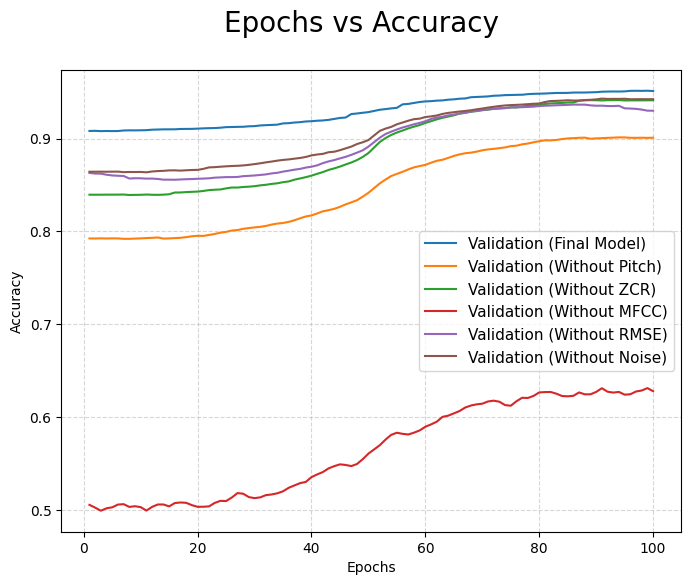

In [474]:
#Comparing different models
epochs = list(range(1, 101)) 
train_accuracy = history.history['accuracy'] 
val_accuracy = history.history['val_accuracy']
smoothed_accuracy = uniform_filter1d(val_accuracy, size=100)

plt.figure(figsize=(8, 6))
plt.plot(epochs, smoothed_accuracy, label="Validation (Final Model)")
plt.plot(epochs, smoothed_accuracy_without_pitch, label="Validation (Without Pitch)")
plt.plot(epochs, smoothed_accuracy_without_zcr, label="Validation (Without ZCR)")
plt.plot(epochs, smoothed_accuracy_without_mfcc, label="Validation (Without MFCC)")
plt.plot(epochs, smoothed_accuracy_without_rmse, label="Validation (Without RMSE)")
plt.plot(epochs, smoothed_accuracy_without_rmse_and_zcr, label="Validation (Without Noise)")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.suptitle("Epochs vs Accuracy", fontsize=20)
plt.legend(prop={'size': 11})
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

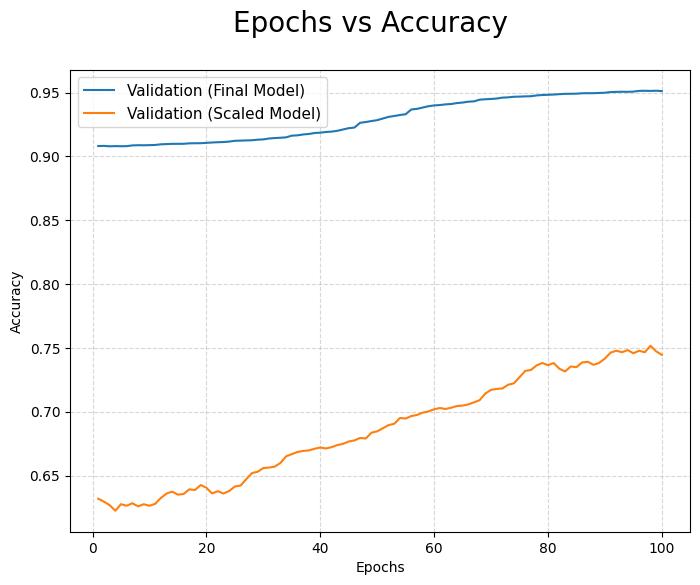

In [523]:
#Comparing scaling
#Used standard scaling

epochs = list(range(1, 101)) 
train_accuracy = history.history['accuracy'] 
val_accuracy = history.history['val_accuracy']
smoothed_accuracy = uniform_filter1d(val_accuracy, size=100)

train_accuracy_2 = history_2.history['accuracy'] 
val_accuracy_2 = history_2.history['val_accuracy']
smoothed_accuracy_2 = uniform_filter1d(val_accuracy_2, size=100)

plt.figure(figsize=(8, 6))
plt.plot(epochs, smoothed_accuracy, label="Validation (Final Model)")
plt.plot(epochs, smoothed_accuracy_2, label="Validation (Scaled Model)")


plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.suptitle("Epochs vs Accuracy", fontsize=20)
plt.legend(prop={'size': 11})
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [85]:
print(unique_labels)

['male_neutral' 'male_fear' 'female_neutral' 'female_fear']


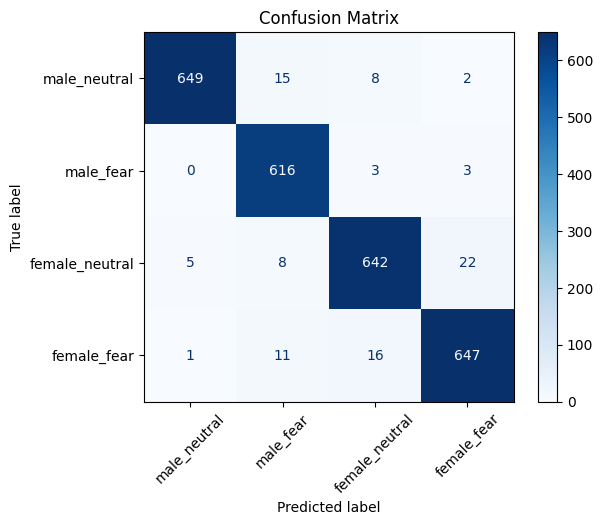

In [111]:
#Confusion matrix
unique_labels = data['Emotions'].unique()
cm = confusion_matrix(y_test, predicted_classes)
disp_1 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
disp_1.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45)
plt.title('Confusion Matrix')
plt.show()

In [93]:
print(cm)

[[649  15   8   2]
 [  0 616   3   3]
 [  5   8 642  22]
 [  1  11  16 647]]


In [100]:
TP = cm[0][0] + cm[0][2] + cm[2][0] + cm[2][2]
FN = cm[0][1] + cm[0][3] + cm[2][1] + cm[2][3]
FP = cm[1][0] + cm[1][2] + cm[3][0] + cm[3][2]
TN = cm[1][1] + cm[1][3] + cm[3][1] + cm[3][3]
cf = np.array([[TP, FN], [FP, TN]])
print(cf)

[[1304   47]
 [  20 1277]]


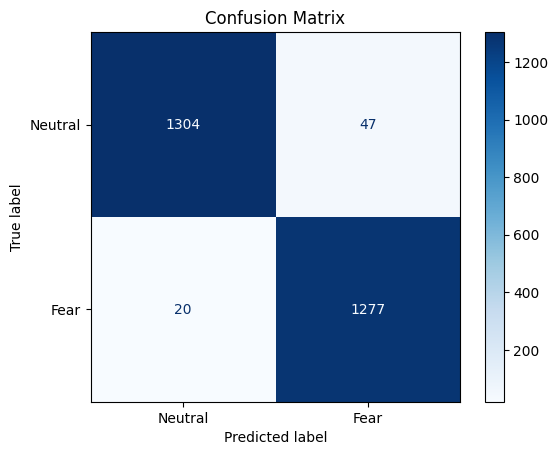

In [112]:
#Confusion matrix for 2 classes
disp_2 = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=['Neutral', 'Fear'])
disp_2.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

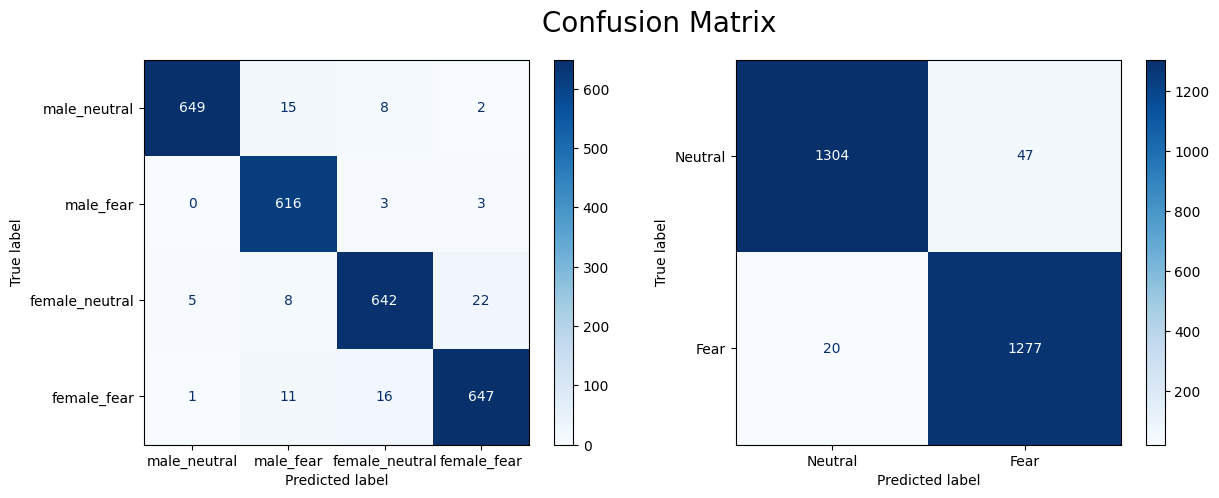

In [123]:
#Confusion matrix in subplot

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

disp_1.plot(cmap=plt.cm.Blues, ax=ax[0])

disp_2.plot(cmap=plt.cm.Blues, ax=ax[1])

plt.suptitle('Confusion Matrix', fontsize=20)

plt.show()

In [128]:
#RF model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
rfc_acc= accuracy_score(y_test, y_pred_kn)

0.6597432024169184


In [130]:
#Finding optimal amount of neighbors
k_list = []
scores_list = [] 
 
for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=k, weights="distance", metric="euclidean")
    knn.fit(X_train,y_train)
    y_pred_kn=knn.predict(np.array(X_test)) 
    k_list.append(k)
    accuracy = metrics.accuracy_score(y_test,y_pred_kn)
    print(k, 'accuracy',accuracy)
    scores_list.append(metrics.accuracy_score(y_test,y_pred_kn))

1 accuracy 0.7280966767371602
2 accuracy 0.7280966767371602
3 accuracy 0.6620090634441088
4 accuracy 0.638595166163142
5 accuracy 0.611404833836858
6 accuracy 0.6057401812688822
7 accuracy 0.5830815709969789
8 accuracy 0.5736404833836858
9 accuracy 0.5717522658610272
10 accuracy 0.5657099697885196
11 accuracy 0.554380664652568
12 accuracy 0.5479607250755287
13 accuracy 0.5460725075528701
14 accuracy 0.5551359516616314
15 accuracy 0.5494712990936556
16 accuracy 0.5392749244712991
17 accuracy 0.5317220543806647
18 accuracy 0.5290785498489426
19 accuracy 0.527190332326284


In [131]:
#KNN model
knn = KNeighborsClassifier(n_neighbors=2, weights="distance", metric="euclidean")
knn.fit(X_train,y_train)
y_pred_kn=knn.predict(np.array(X_test))
#acc score for KNN
kn_acc=accuracy_score(y_test, y_pred_kn)

0.7280966767371602


In [167]:
#SVM model
model_svc=svm.SVC(kernel='rbf')
model_svc.fit(X_train,y_train)
y_pred_svc = model_svc.predict(X_test)
svc_acc = accuracy_score(y_test, y_pred_svc)

In [170]:
#Acc score for CNN
cnn_acc=accuracy_score(y_test, predicted_classes)

/var/folders/fy/p_zfmrqj0yn93nq3xwgxytjw0000gn/T/ipykernel_3325/1182153163.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=Accuracy, palette='husl')


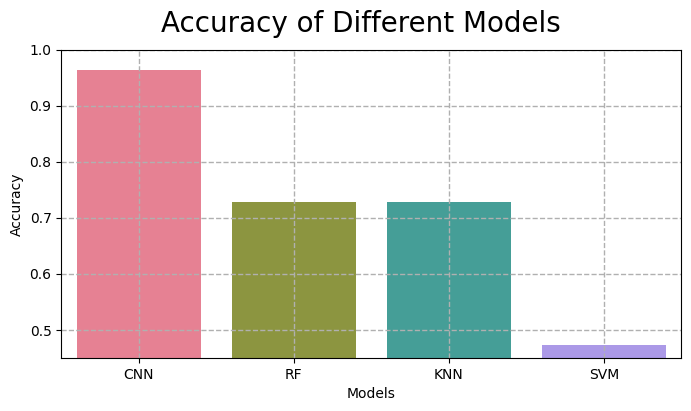

In [201]:
#Plot of different models
f, ax = plt.subplots(figsize=(8, 4))

Accuracy = [cnn_acc, rfc_acc, kn_acc, svc_acc]
models = ['CNN', 'RF', 'KNN', 'SVM']
sns.barplot(x=models, y=Accuracy, palette='husl')
ax.set(ylabel="Accuracy",
       xlabel="Models",
      ylim=(0.45,1.0))
plt.grid(True, which='both', linestyle='--', linewidth=1)
plt.suptitle('Accuracy of Different Models', fontsize=20)
plt.show()

In [91]:
#Saving model

model_96_5='96.5_accuracy_model.pkl'

with open(model_96_5, 'wb') as file:  
    pickle.dump(model, file)